 # Lab 4: Solving Ordinary Differential Equations with the Runge-Kutta Methods
 ### Christopher Rordell
 ##### EOSC 511

 ## Problem tableau

 Write out the tableau for
 $$
 \\
 $$
 - 1\) Heun's Method
 $$
 \begin{array}{|c|c|c|c|}\hline i & {a_{i}} &  {b_{i j}} \hspace{1cm} &{c_{i}} \\ \hline 1 & {0} & {0} \hspace {1cm} {0} & {\frac{1}{4}} \\ {2} & {\frac{2}{3}} & {\frac{2}{3}} \hspace{1cm} {0} & {\frac{3}{4}} \\ \hline j=& {} & {1} \hspace{1cm} {2} & {} \\ \hline\end{array}
 $$
 $$
 \\
 $$
 - 2\) The fourth-order Runge-Kutta method
 $$
 \begin{array}{|c|c|c|c|}\hline i & {a_{i}} & {b_{i j}} \hspace{1cm} \hspace{1cm} \hspace{1cm} &{c_{i}} \\ \hline 1 & {0} & {0} \hspace{1cm} {0} \hspace{1cm} {0} \hspace{1cm} {0} & {\frac{1}{6}} \\ {2} & {\frac{1}{2}} & {\frac{1}{2}} \hspace{1cm} {0}  \hspace{1cm} {0} \hspace{1cm} {0} & {\frac{1}{3}}  \\ {3} & {\frac{1}{2}} & {0} \hspace{1cm} {\frac{1}{2}}  \hspace{1cm} {0} \hspace{1cm} {0} & {\frac{1}{3}}  \\ {4} & {1} & {0} \hspace{1cm} {0}  \hspace{1cm} {1} \hspace{1cm} {0} & {\frac{1}{6}} \\ \hline j=& {} & {1} \hspace{1cm} {2} \hspace{1cm} {3} \hspace{1cm} {4}& {} \\ \hline\end{array}
 $$

 ## Problem Runge Kutta4
 In the cell below, compare compare solutions to the test
 problem
 $$
 \\
 $$
 *EQ: Test*
 $$
 \frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1
 $$
 $$
 \\
 $$
 generated with the
 fourth-order Runge-Kutta method to solutions generated by the forward
 Euler and midpoint methods.

 1.  Based on the numerical solutions of (EQ: Test), which of the
     three methods appears more accurate?

 **Based on the numeric solution of Eq: Test the fourth-order
 Runge-Kutta appears most accurate?**

 $$
 \\
 $$
 2.  Again determine how the error changes relative to the change in
     stepsize, as the stepsize is halved.

 **The error in all methods decreases as the step size decreases.
  However, Elure forward becomes much less stable than that of Runge-Kutta
  and mid-point as the step size increase. In general, Runge-Kutta
  performs best and has the least error at the four-step sizes plotted.**

******************************
context imported. Front of path:
/Users/rodell/repos/numeric_students
back of path: /Users/rodell/.ipython
******************************

through /Users/rodell/repos/numeric_students/numeric_notebooks/lab4/context.py


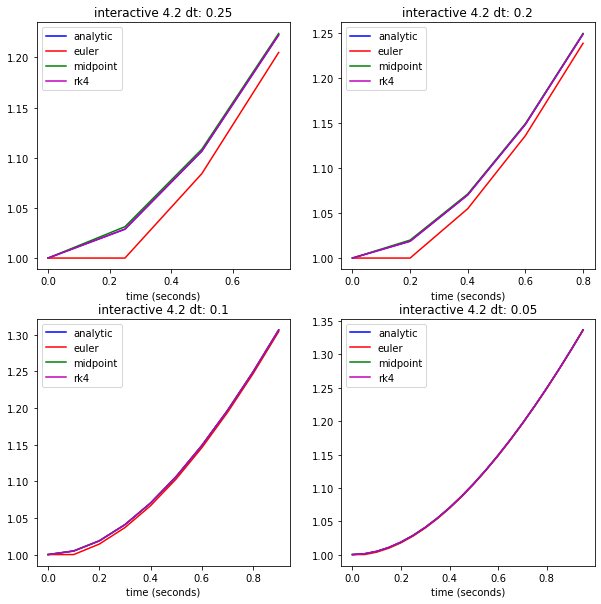

In [1]:
import context
import numpy as np
from matplotlib import pyplot as plt
from numlabs.lab4.lab4_functions import \
    initinter41,eulerinter41,midpointinter41, rk4ODEinter41

dt = [0.25, 0.20, 0.10, 0.05]
theFig=plt.figure(figsize = [10,10])
theFig.clf()

for stepsize in range(len(dt)):
    initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':dt[stepsize],'c1':-1.,'c2':1.,'c3':1.}
    coeff = initinter41(initialVals)
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ye=[]
    ym=[]
    yrk=[]
    y=coeff.yinitial
    ye.append(coeff.yinitial)
    ym.append(coeff.yinitial)
    yrk.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=eulerinter41(coeff,y,timeVec[i-1])
        ye.append(ynew)
        ynew=midpointinter41(coeff,y,timeVec[i-1])
        ym.append(ynew)
        ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
        yrk.append(ynew)
        y=ynew
    analytic=timeVec + np.exp(-timeVec)
    theAx=theFig.add_subplot(2, 2, (stepsize +1))
    l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
    theAx.set_xlabel('time (seconds)')
    l2=theAx.plot(timeVec,ye,'r-',label='euler')
    l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
    l4=theAx.plot(timeVec,yrk,'m-',label='rk4')
    theAx.legend(loc='best')
    theAx.set_title('interactive 4.2 dt: ' + str(dt[stepsize]))


 ## Problem embedded
 Though the error estimate is for the embedded fourth-order Runge-Kutta method,
 the fifth-order method can be used in practice for calculating the solution,
 the assumption being the fifth-order method should be at least as accurate as
 the fourth-order method. In the demo below, compare solutions of the test problem EQ:test
 $$
 \\
 $$
 *EQ: Test*
 $$
 \frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1
 $$
 $$
 \\
 $$
 - a\) Which method is more accurate?

 **The Runge-Kutta initialize with the Cash-Karp coefficients (RKCK)
 was more accurate at each time steep.....though you need to zoom in
 to view on the order of 10^-6 to see a discernible difference.**

 $$
 \\
 $$

 - b\) Again, determine how the error decreases as you halve the stepsizes.

 **Again, error in all methods decreases as the step size decreases. However,
  in this case, Runge-Kutta not initialized with the Cash-Karp coefficients
  (RK) had a tinny bit more error than RKCK.**

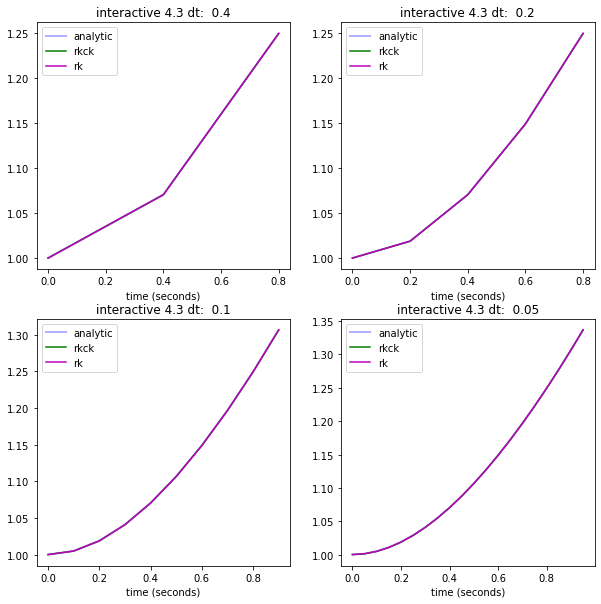

In [2]:
from numlabs.lab4.lab4_functions import initinter41,rk4ODEinter41,rkckODEinter41

dt = [0.4, 0.20, 0.10, 0.05]
theFig=plt.figure(figsize = [10,10])
theFig.clf()

for stepsize in range(len(dt)):
    initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':dt[stepsize],'c1':-1.,'c2':1.,'c3':1.}
    
    coeff = initinter41(initialVals)
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ye=[]
    ym=[]
    yrk=[]
    yrkck=[]
    y1=coeff.yinitial
    y2=coeff.yinitial
    yrk.append(coeff.yinitial)
    yrkck.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
        yrk.append(ynew)
        y1=ynew
        ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
        yrkck.append(ynew)
        y2=ynew
    analytic=timeVec + np.exp(-timeVec)
    theAx=theFig.add_subplot(2, 2, (stepsize +1))
    l1=theAx.plot(timeVec,analytic,'b-',label='analytic', lw = 2, alpha = 0.3)
    theAx.set_xlabel('time (seconds)')
    l2=theAx.plot(timeVec,yrkck,'g-',label='rkck')
    l3=theAx.plot(timeVec,yrk,'m-',label='rk')
    theAx.legend(loc='best')
    theAx.set_title('interactive 4.3 dt:  ' + str(dt[stepsize]))


 ## Problem coding A
 As set up above, do_example.py solves the damped, harmonic
 oscillator with the (unstable) forward Euler method.

 - 1\) Write a new routine that solves the harmonic oscilator
 using Heun’s method along the lines of the routines in lab4_functions.py
  Hand in a fresh notebook with the code and a plot.

Text(0, 0.5, 'y0')

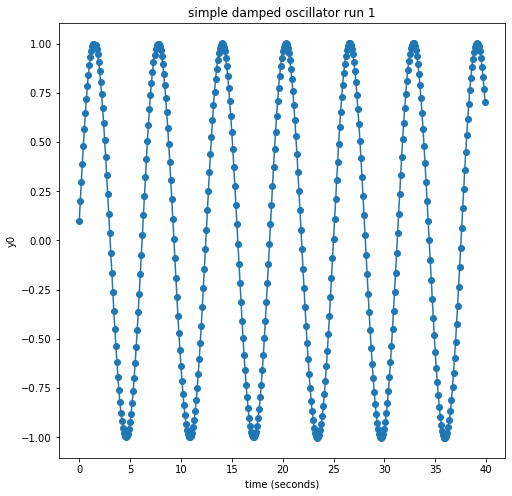

In [3]:
import json
from numlabs.lab4.example.do_example import get_init,euler4

def heun(coeff, y, derivs):
    """
    This function defines the huens method
    """
    k1 = coeff.dt * derivs(coeff,y)
    k2 = coeff.dt * derivs(coeff,y + ((2/3) * k1))
    ynew = y + (1.0/4.0) * (k1 + (3.0 * k2))
    return ynew


#
# specify the derivs function
#
def derivs(coeff, y):
    f=np.empty_like(y) #create a 2 element vector to hold the derivitive
    f[0]=y[1]
    f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
    return f
#
# first make sure we have an input file in this directory
#

coeff=get_init()

#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time)
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=heun(coeff,y,derivs)
    savedata[i]=y[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0')


 ## Problem coding B
 - 1\) Now solve the following test equation by both
 the midpoint and Heun’s method and compare.
 $$
 \frac{dy}{dt} = -y +t +1.0,  \;\;\;\; y(0) =1
 $$
 $$
 \\
 $$
 Choose two sets of initial conditions and determine if there is any
 difference between the two methods when applied to either problem.
 Should there be? Explain by analyzing the steps that each method is taking.

 **There is no difference between the two solutions even with varied time steps.
 I would think there be a slight difference however both are second-order
 solutions. The steps that each method takes are slightly varied with Heus
  requiring more steps in its calculation. This makes Heuns a bit more
 computationly expensive compared to a midpoint.**
 $$
 \\
 $$
 - 2\) Add your answer as new cells to the problem A notebook
 *See cell below**

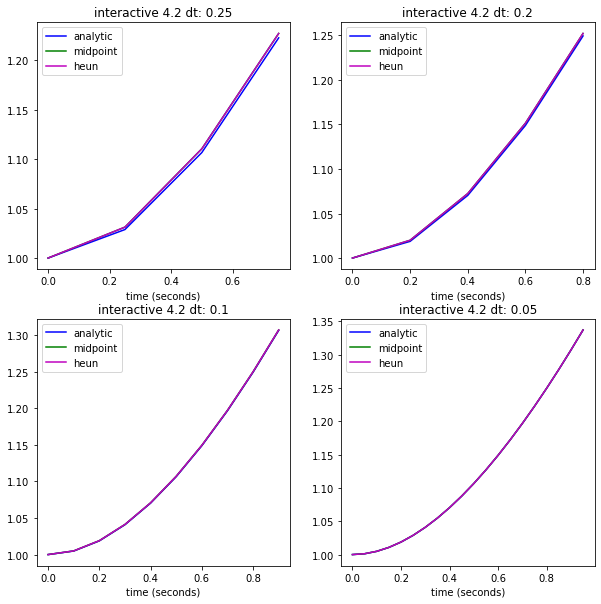

In [4]:

from numlabs.lab4.lab4_functions import initinter41,derivsinter41,midpointinter41


def heuninter41(coeff, y, theTime):
    k1 = coeff.dt * derivsinter41(coeff,y,theTime)
    k2 = coeff.dt * derivsinter41(coeff,y + ((2.0/3.0) * k1),theTime+(2.0/3.0)*coeff.dt)
    y = y + (1.0/4.0) * (k1 + (3.0 * k2))
    return y




dt = [0.25, 0.20, 0.10, 0.05]
theFig=plt.figure(figsize = [10,10])
theFig.clf()

for stepsize in range(len(dt)):
    initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':dt[stepsize],'c1':-1.,'c2':1.,'c3':1.}
    coeff = initinter41(initialVals)
    timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
    nsteps=len(timeVec)
    ym=[]
    yhu=[]
    y=coeff.yinitial
    ym.append(coeff.yinitial)
    yhu.append(coeff.yinitial)
    for i in np.arange(1,nsteps):
        ynew=midpointinter41(coeff,y,timeVec[i-1])
        ym.append(ynew)
        ynew=heuninter41(coeff,y,timeVec[i-1])
        yhu.append(ynew)
        y=ynew
    analytic=timeVec + np.exp(-timeVec)
    theAx=theFig.add_subplot(2, 2, (stepsize +1))
    l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
    theAx.set_xlabel('time (seconds)')
    l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
    l4=theAx.plot(timeVec,yhu,'m-',label='heun')
    theAx.legend(loc='best')
    theAx.set_title('interactive 4.2 dt: ' + str(dt[stepsize]))


 ## Problem coding C
 - 1\) Solve the Newtonian cooling equation of lab 1 by any of the above methods.
 $$
 \frac{d T}{d t} \quad=-\lambda \quad\left(T-T_{a}\right)
 $$
 **Used the Heuns Methods in solving for the cooling equation.
  Used varied dt and lambda values.**
 - 2\) Add cells that do this and also generate some plots,
 showing your along with the parameter values and initial conditions.

 **See cell below**

/Users/rodell/miniconda3/envs/numeric/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


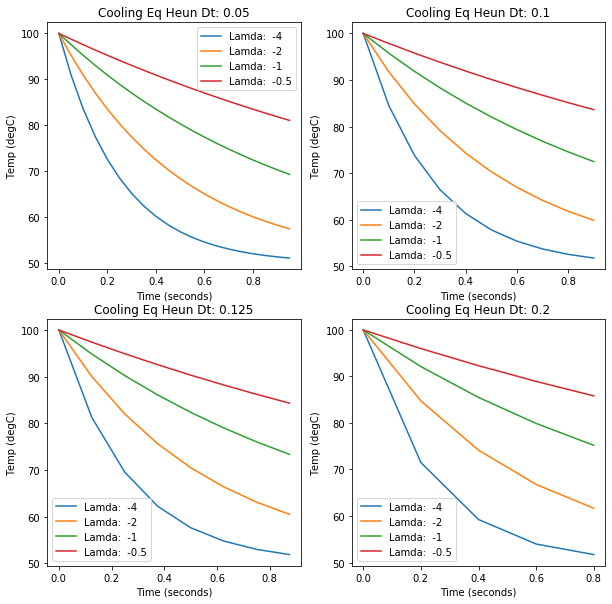

In [5]:


npts = [20, 10, 8, 5] 
tend = 1
To  = 100
Ta  = 50
theLambda = [-4, -2, -1, -0.5]

def heat(theTemp,Ta,theLambda):
    out=theLambda*(theTemp-Ta)
    return out

def heunfun(npts,tend,To,Ta,theLambda):
    dt=tend/npts
    theTemp=np.empty([npts,],np.float64)
    theTemp[0]=To
    theTime=np.empty_like(theTemp)
    theTime[0] = 0
    for i in np.arange(1,npts):
        k1 = coeff.dt * heat(theTemp[i-1],Ta,theLambda)
        k2 = dt * heat(theTemp[i-1] + ((2.0/3.0) * k1),Ta,theLambda)
        theTemp[i] = theTemp[i-1] + (1.0/4.0) * (k1 + (3.0 * k2))
        theTime[i] = theTime[i-1]+dt
    return (theTime,theTemp)


theFig=plt.figure(figsize = [10,10])
theFig.clf()

for stepsize in range(len(npts)):
    for i in range(len(theLambda)):
        theTime,theTemp = heunfun(npts[stepsize],tend,To,Ta,theLambda[i])
        theAx=theFig.add_subplot(2, 2, (stepsize +1))
        theAx.set_xlabel('Time (seconds)')
        theAx.set_ylabel('Temp (degC)')
        l4=theAx.plot(theTime,theTemp,label= ( "Lamda:  "
+ str(theLambda[i])))
        theAx.legend(loc='best')
        theAx.set_title('Cooling Eq Heun Dt: ' + str(round((tend/npts[stepsize]),3)))



